In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
df = pd.read_csv("DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


##### The dataset has been loaded successfully

#### Performing warm up analysis for the data

In [4]:
df.shape

(10127, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10067.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9190.058902,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.500000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4557.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11127.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [8]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,Scotland,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189


#### Performing missing value analysis

In [9]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

##### There are 2 missing value columns are present in the data . Card_category and Credit_limit

#### Separtting the dataset as categorical and numerical columns

In [10]:
numeric_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

table = [numeric_columns, categorical_columns]
print(tabulate({"numerical":numeric_columns,
                "categorical": categorical_columns}, headers = ["numerical", "categorical"]))

numerical                 categorical
------------------------  ---------------
CLIENTNUM                 Attrition_Flag
Customer_Age              Gender
Dependent_count           Education_Level
Months_on_book            Marital_Status
Total_Relationship_Count  Income_Category
Months_Inactive_12_mon    Card_Category
Contacts_Count_12_mon     Region
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Trans_Amt
Total_Trans_Ct
Avg_Utilization_Ratio


#### Cleaning the missing values from the columns
- For categorical we have to replace it by using mode of the column 
- For numerical column we have to treat it with the mean or median of the columns 

In [11]:
def info_of_cat(col):
    print(f"Unique values in {col} are :{df[col].unique()}")
    print(f"Mode of {col} is : {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is : {df[col].isnull().sum()}")

#### 1) Treating with missing values for the Card_Category column

In [12]:
info_of_cat("Card_Category")

Unique values in Card_Category are :['Blue' 'Gold' 'Silver' nan 'Platinum']
Mode of Card_Category is : Blue
Number of missing values in Card_Category is : 132


In [13]:
df["Card_Category"].fillna("Blue",inplace=True)

##### The null values has been imputed successfully 

#### 2) Treating with missing values for the Credit_Limit column

In [14]:
a = df["Credit_Limit"].mean()
a

8703.180550312904

In [15]:
df["Credit_Limit"].fillna(a,inplace=True)

In [16]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

##### All the null values present in the data has been imputed with logical methods . Now, there is no null value present in the data

### Performing outlier Analysis for the numerical columns

#### 1) CLIENTNUM column outlier Analysis

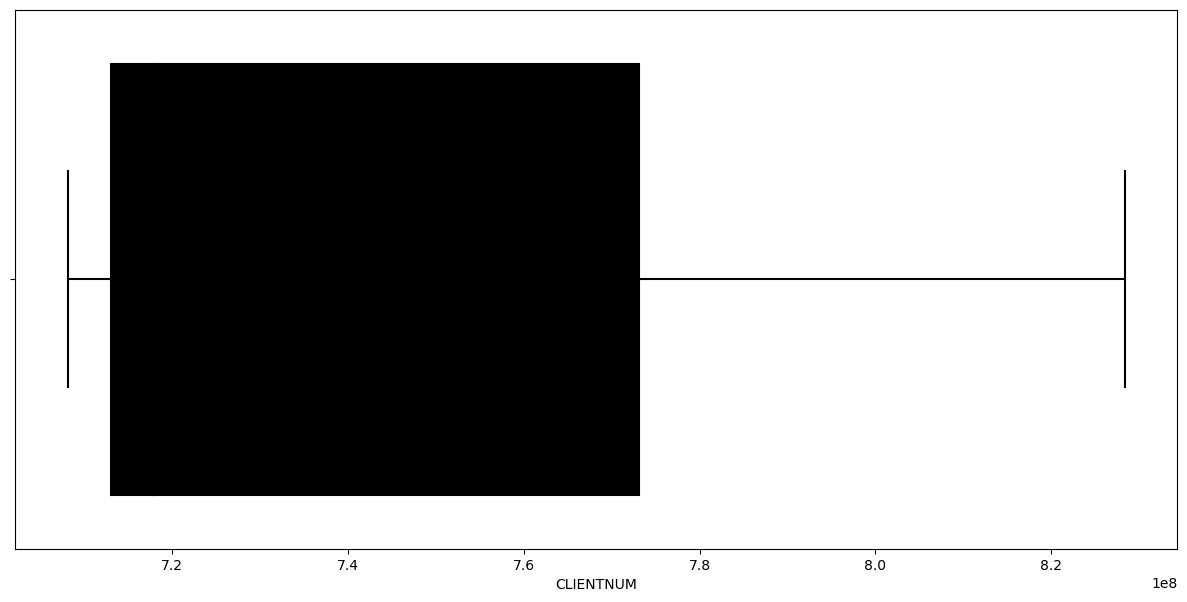

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["CLIENTNUM"], color = "black") 
plt.show()

We can see that the maximum value present in the range of 7.2 - 7.7 and there is no outlier present in the data.

#### 2) Customer_Age column outlier Analysis

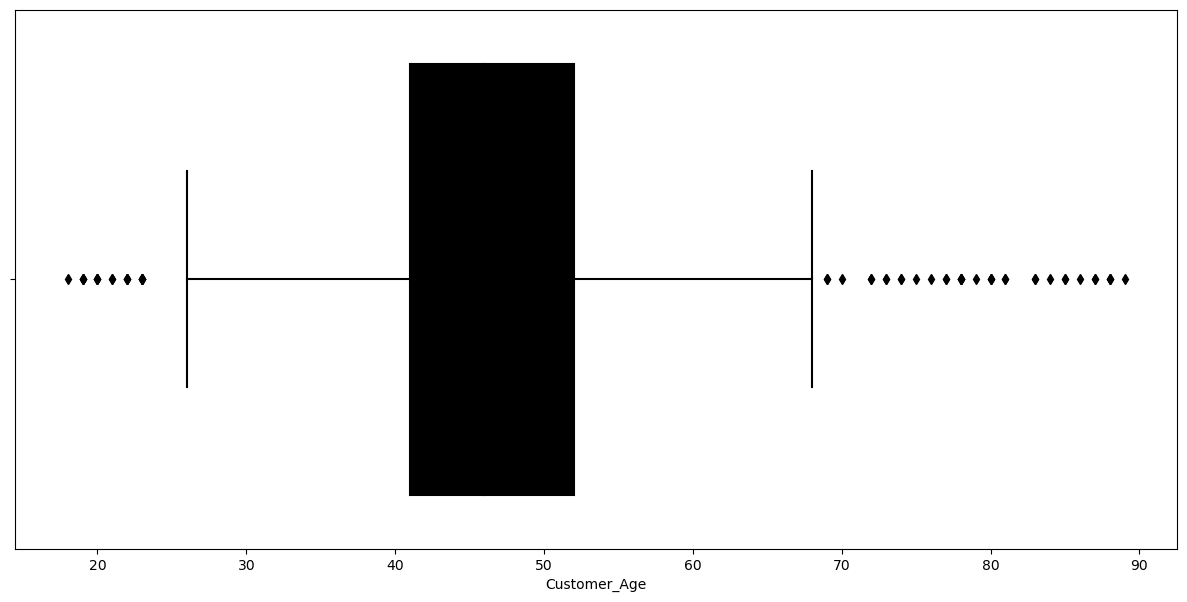

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Customer_Age"], color = "black") 
plt.show()

There are some outliers present in the data . 

#### 3) Dependent_count column outlier Analysis

In [19]:
w = df["Dependent_count"].mean()
w

2.7874000197491853

In [20]:
s = df[df["Dependent_count"]>w].index
s

Int64Index([    0,     1,     2,     3,     4,     6,     8,    10,    13,
               15,
            ...
            10090, 10092, 10095, 10098, 10104, 10108, 10109, 10111, 10116,
            10119],
           dtype='int64', length=4768)

In [21]:
for index in s:
    df.loc[s,"Dependent_count"]= w

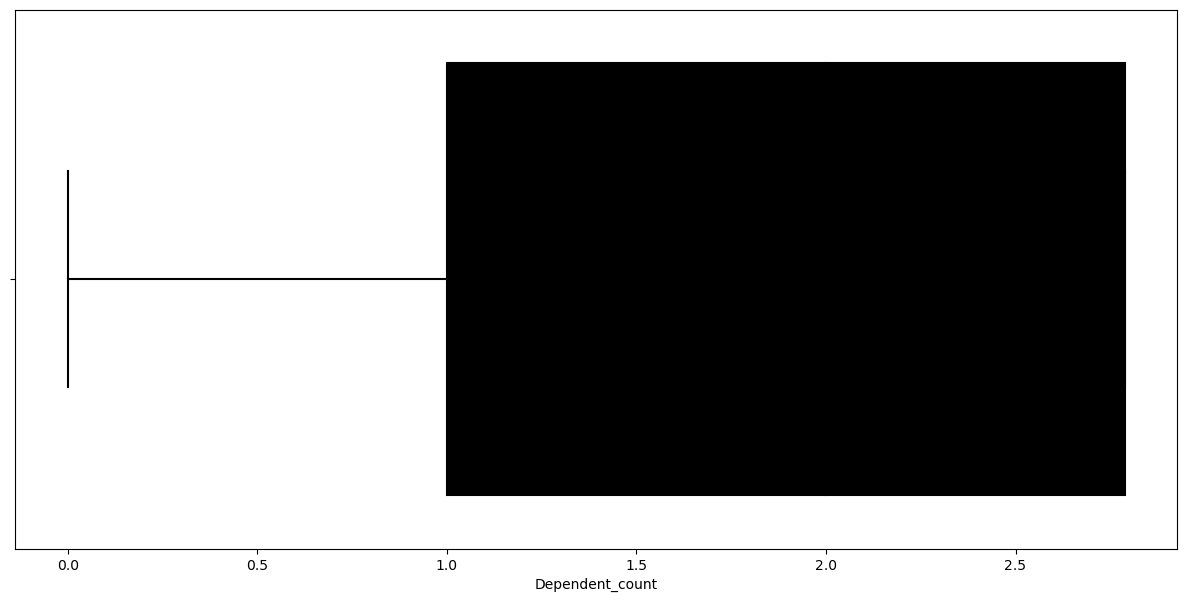

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Dependent_count"], color = "black") 
plt.show()

The outliers has been treated with the mean valure of the column

#### 4) Month_on_book column outlier Analysis

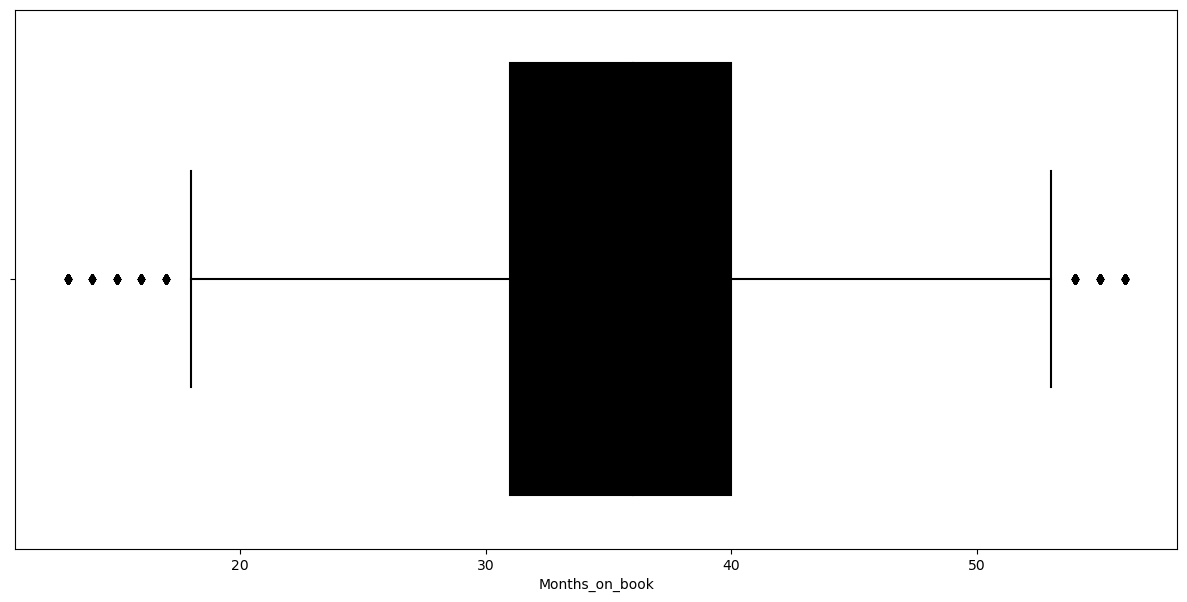

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Months_on_book"], color = "black") 
plt.show()

Here we can see that the maximum data present in the 30 - 40 range

#### 5) Total_Relationship_Count column outlier Analysis

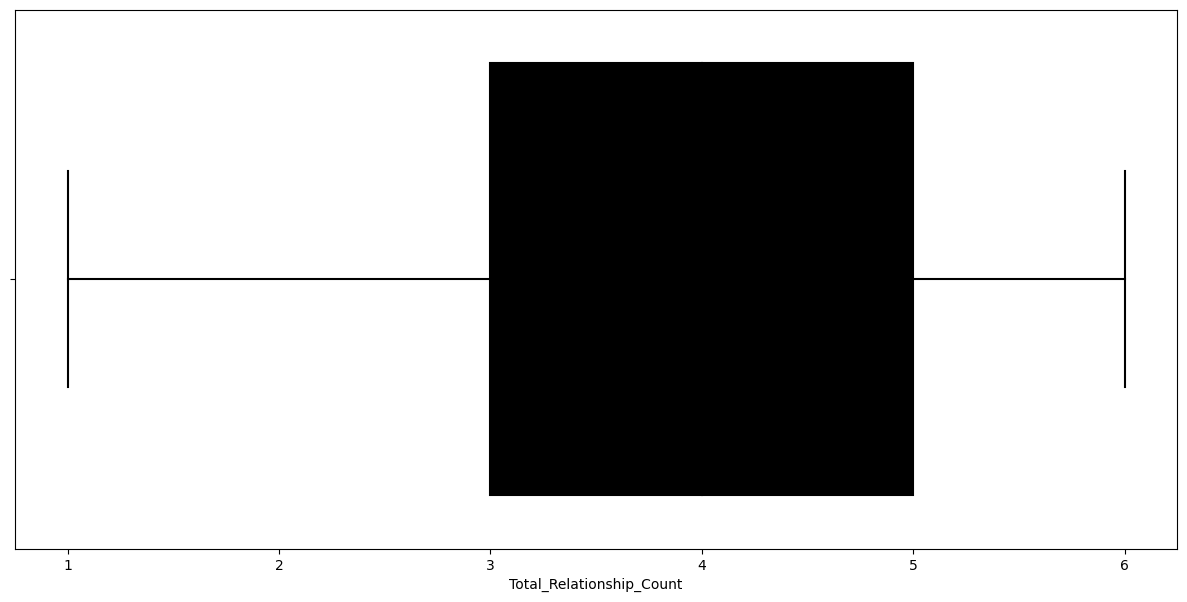

In [24]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Total_Relationship_Count"], color = "black") 
plt.show()

There is no null value present in the data , The maximum data present in 3 - 5

#### 6) Months_Inactive_12_mon Column outlier Analysis

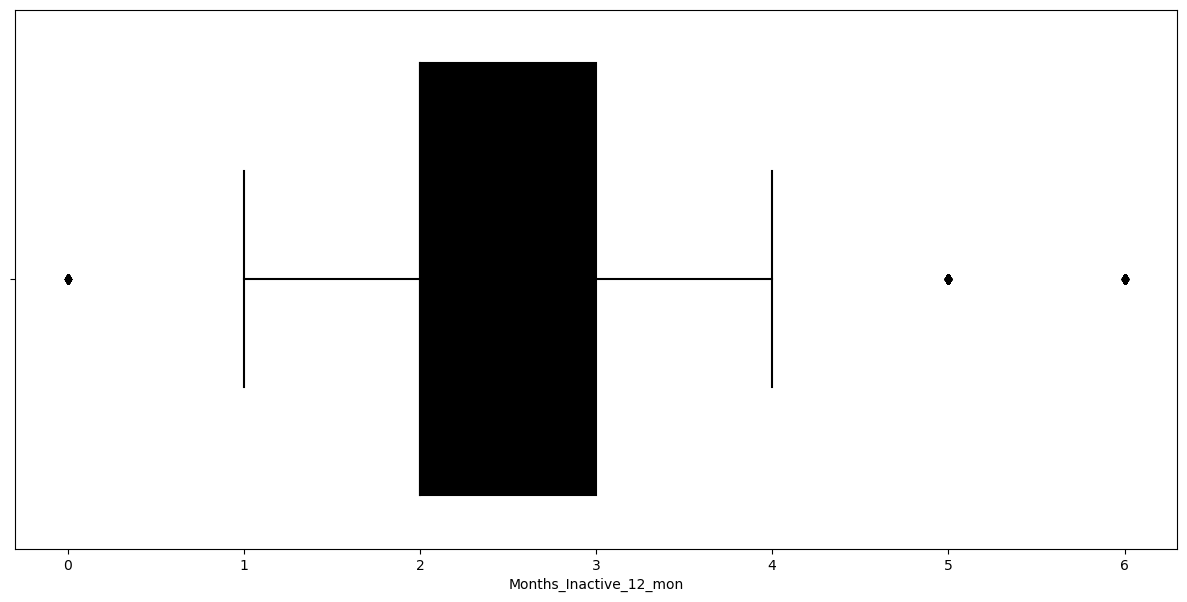

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Months_Inactive_12_mon"], color = "black") 
plt.show()

The maximum data present in 2-3 range.

#### 7) Contacts_Count_12_mon column outlier Analysis

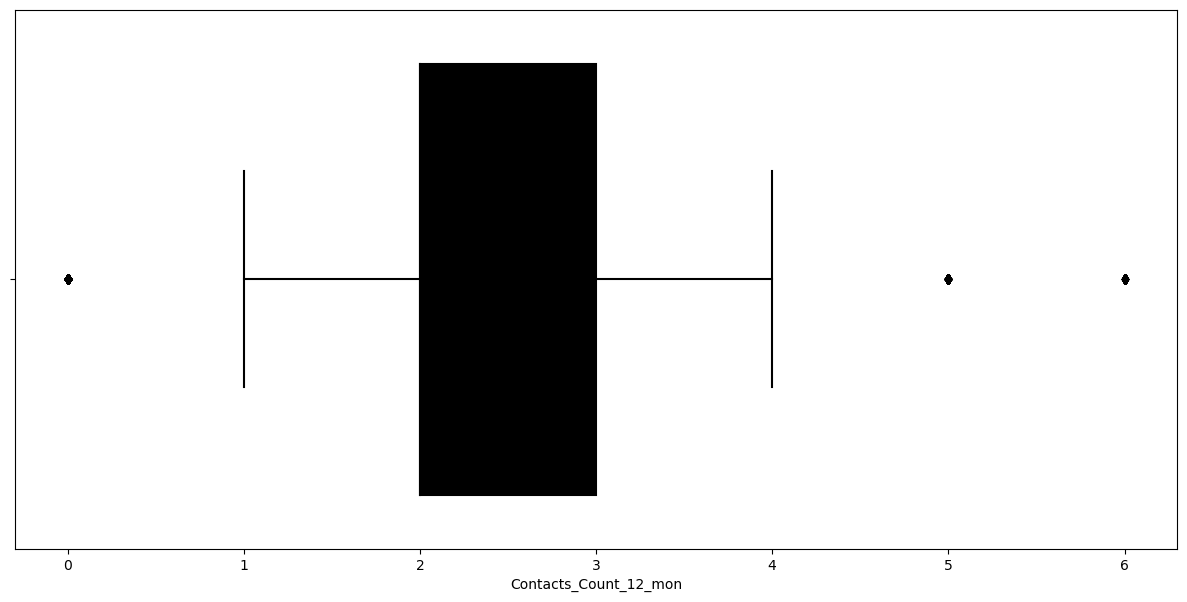

In [26]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Contacts_Count_12_mon"], color = "black") 
plt.show()

The max data present in the range of 2 -3

#### 8) Credit_Limit column outlier Analysis

In [27]:
e = df["Credit_Limit"].mean()
e

8703.180550312904

In [28]:
d = df[df["Credit_Limit"]>e].index
d

Int64Index([    0,     6,     7,     8,     9,    11,    12,    16,    17,
               19,
            ...
            10110, 10111, 10112, 10113, 10116, 10117, 10118, 10119, 10120,
            10126],
           dtype='int64', length=3158)

In [29]:
for index in d:
    df.loc[d,"Credit_Limit"]=e

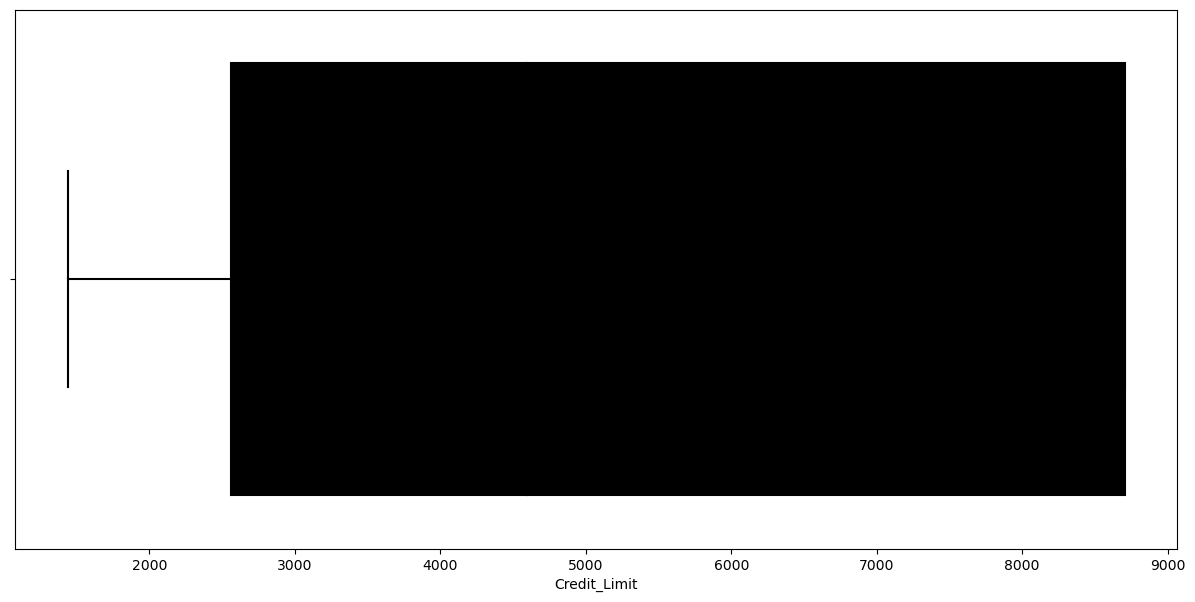

In [30]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Credit_Limit"], color = "black") 
plt.show()

There are some null value present in the data and then treated with the outliers by using the mean value of the column

#### 9) Total_Revolving_Bal column outlier Analysis

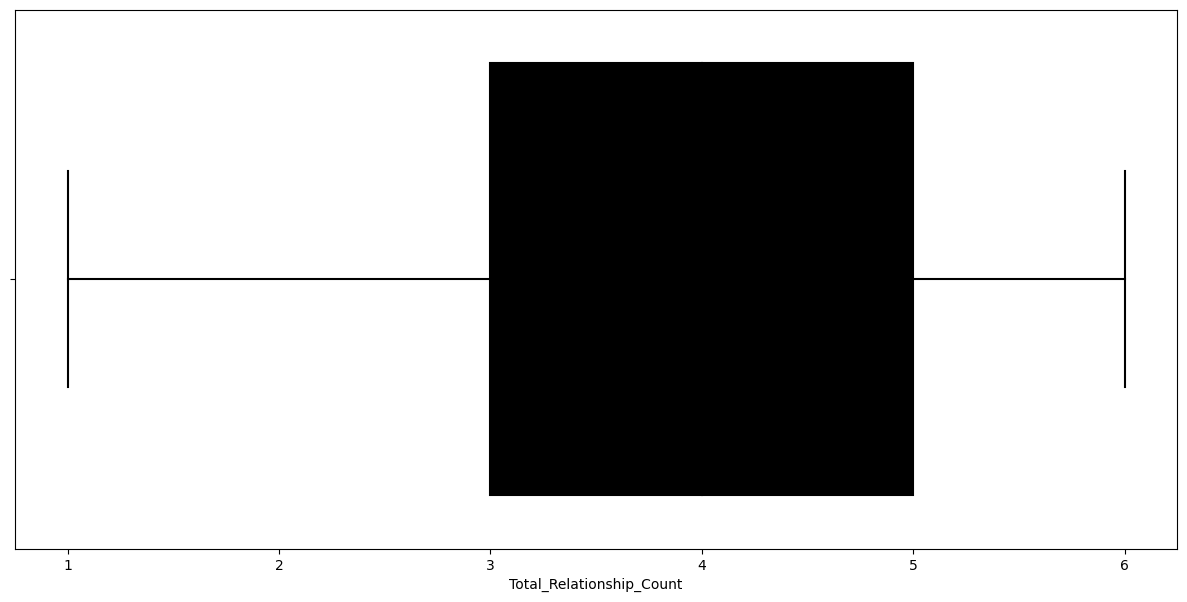

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Total_Relationship_Count"], color = "black") 
plt.show()

There is no null value present in the data

#### 10) Avg_open_to_Buy column outlier Analysis

In [32]:
r = df["Avg_Open_To_Buy"].mean()
r

7469.139636614989

In [33]:
f = df[df["Avg_Open_To_Buy"]>r].index
f

Int64Index([    0,     6,     7,     8,     9,    11,    12,    16,    17,
               19,
            ...
            10108, 10110, 10112, 10113, 10116, 10117, 10118, 10119, 10120,
            10126],
           dtype='int64', length=3191)

In [34]:
for index in f:
    df.loc[f,"Avg_Open_To_Buy"]=r

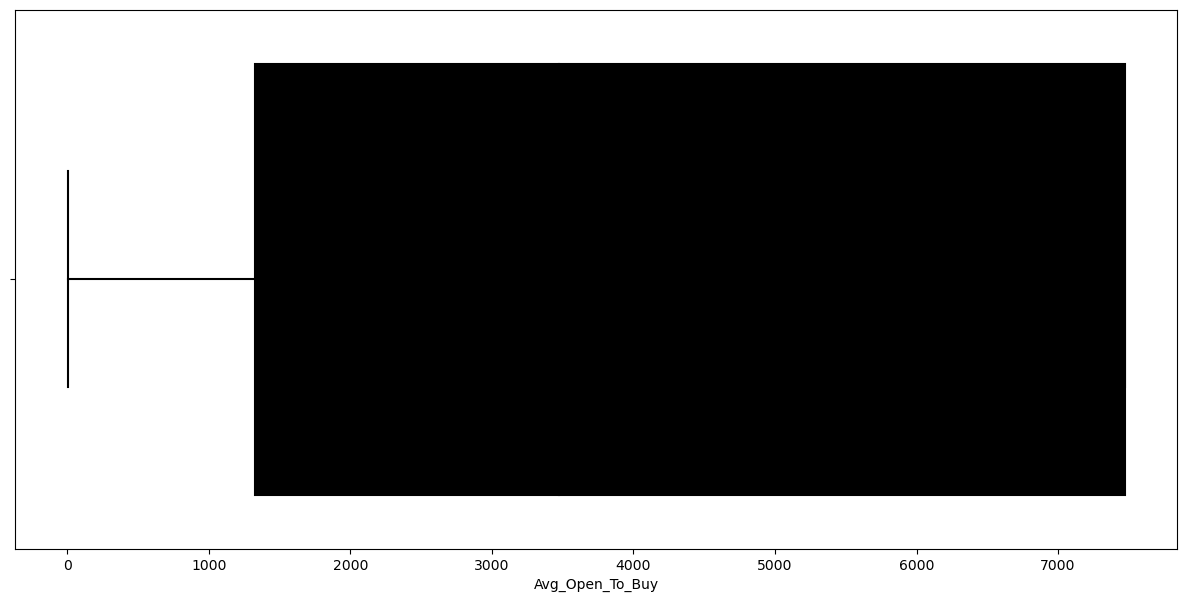

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Avg_Open_To_Buy"], color = "black") 
plt.show()

There are some outlier present in the data and then treated with outliers 

#### 11) Total_Trans_Amt column outlier Analysis

In [36]:
t = df["Total_Trans_Amt"].mean()
t

4404.086303939963

In [37]:
g = df[df["Total_Trans_Amt"]>t].index
g

Int64Index([ 1167,  1442,  1775,  1853,  2038,  2250,  2345,  2365,  2424,
             2539,
            ...
            10117, 10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125,
            10126],
           dtype='int64', length=3621)

In [38]:
for index in g:
    df.loc[g,"Total_Trans_Amt"]=t

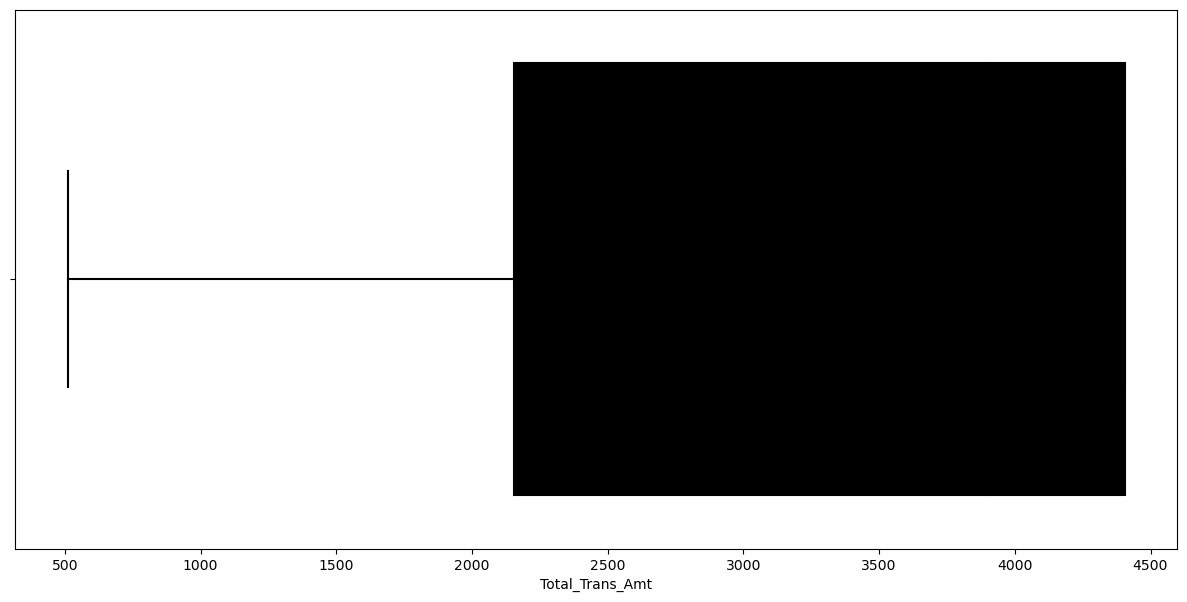

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Total_Trans_Amt"], color = "black") 
plt.show()

There are some outlier present in the data and then treated with outliers 

#### 12) Total_Trans_Ct column outlier Analysis

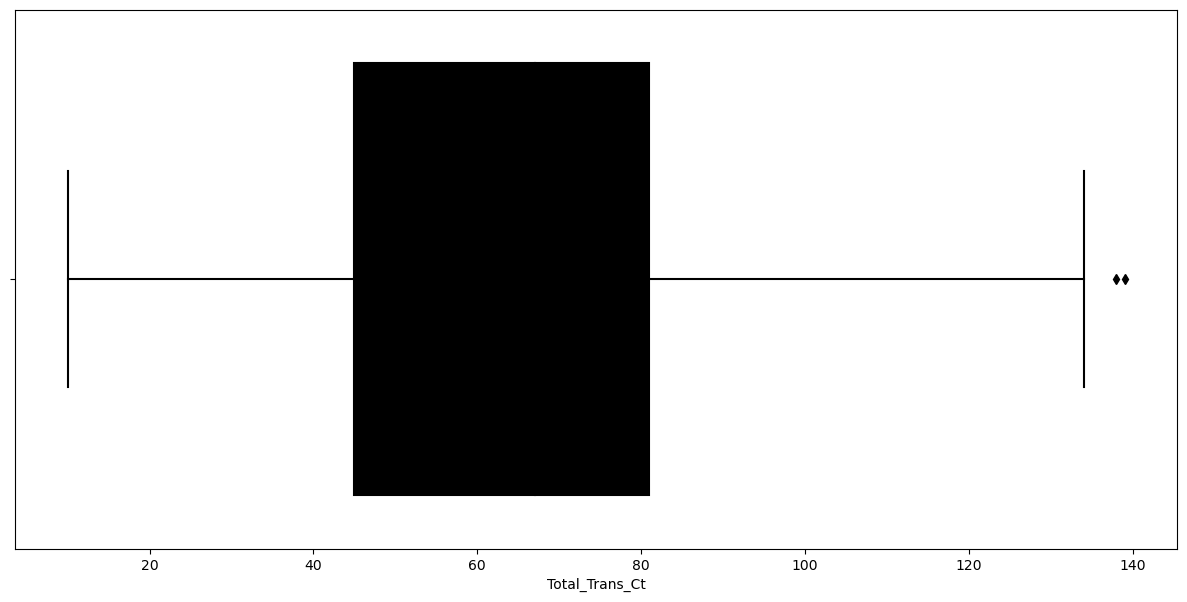

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Total_Trans_Ct"], color = "black") 
plt.show()

There is no null value present in the data

#### 13) Avg_Utilization column outlier Analysis 

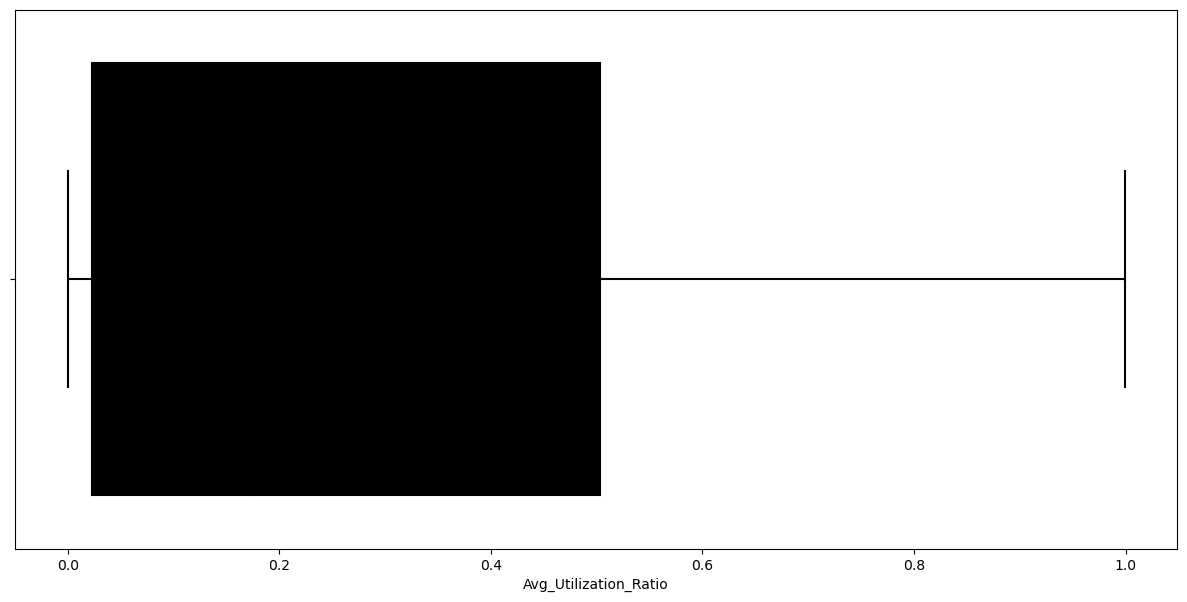

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(x = df["Avg_Utilization_Ratio"], color = "black") 
plt.show()

There is no null value present in the data

In [42]:
df.to_csv("Capstone_project.csv",index=False)